# Data Science with Python

## Chapter 4

## The Bias-Variance Trade-Off

Learning Objectives

By the end of this chapter, you will be able to:

• Describe the log-loss cost function of logistic regression.

• Implement the gradient descent procedure for estimating model parameters.

• Articulate the formal statistical assumptions of the logistic regression model.

• Characterize the bias-variance trade-off and use it to improve models.

• Formulate lasso and ridge regularization and use them in scikit-learn.

• Design a function to choose regularization hyperparameters by cross-validation.

• Engineer interaction features to improve an underfit model

This chapter presents the final details of logistic regression and equips you with the tools
for improving underfitting and overfitting by employing regularization and simple feature
engineering.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 200 #high res figures

In [2]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

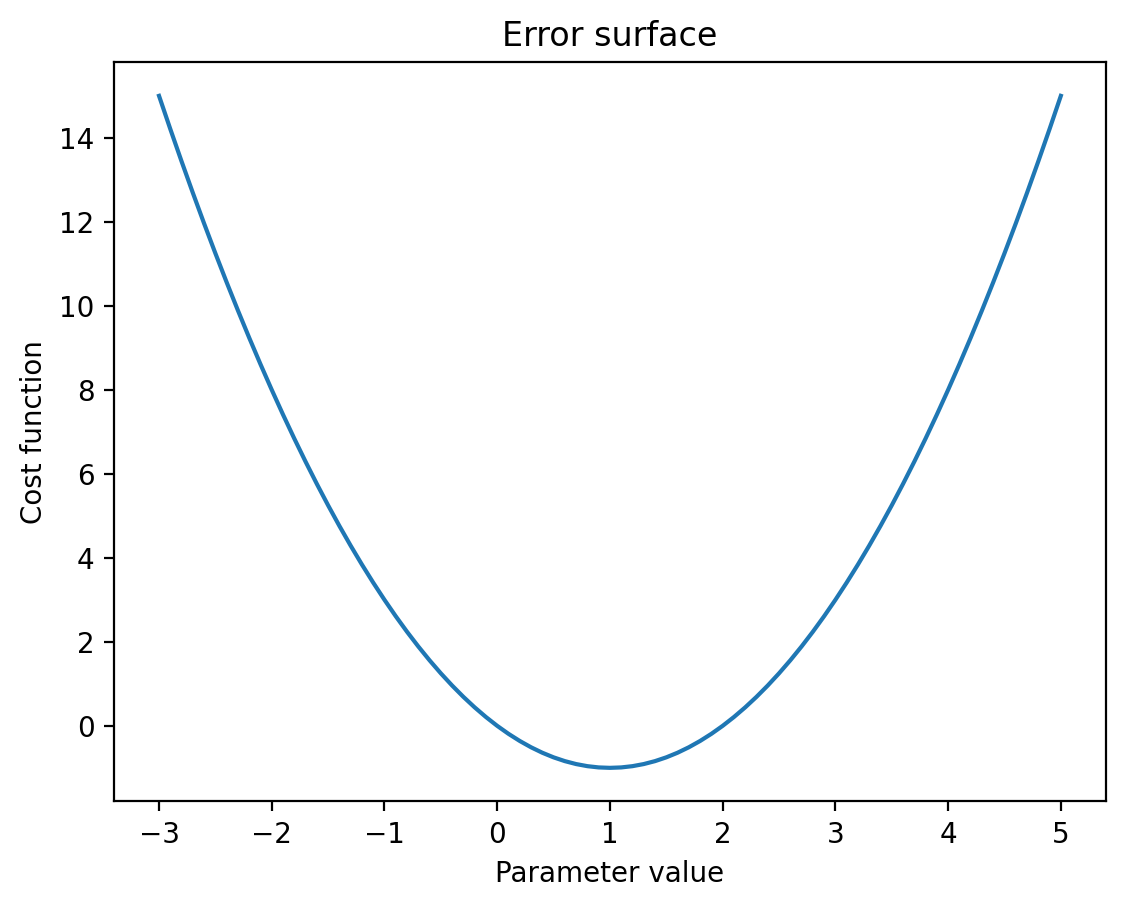

In [3]:
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

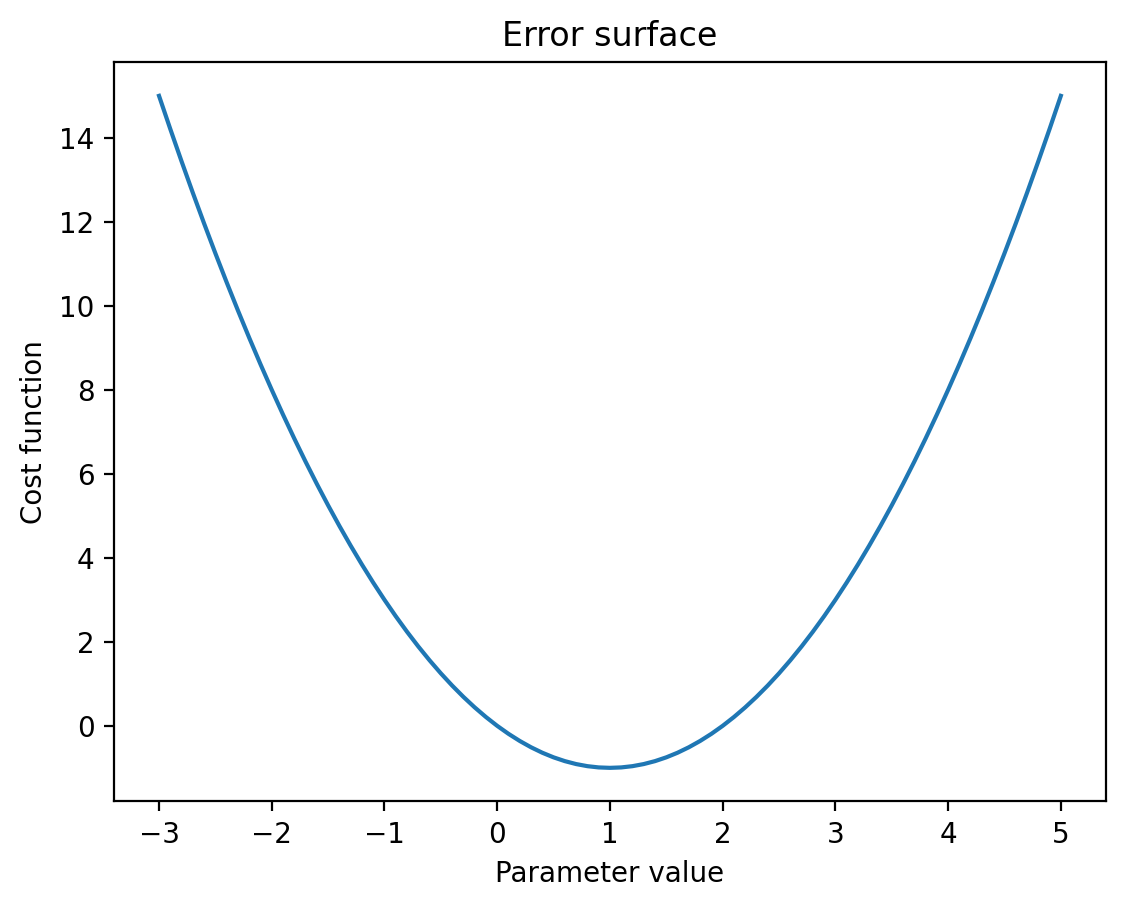

In [4]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

In [5]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.8
x_next = x_start - gradient(x_start)*learning_rate
x_next

-1.1000000000000005

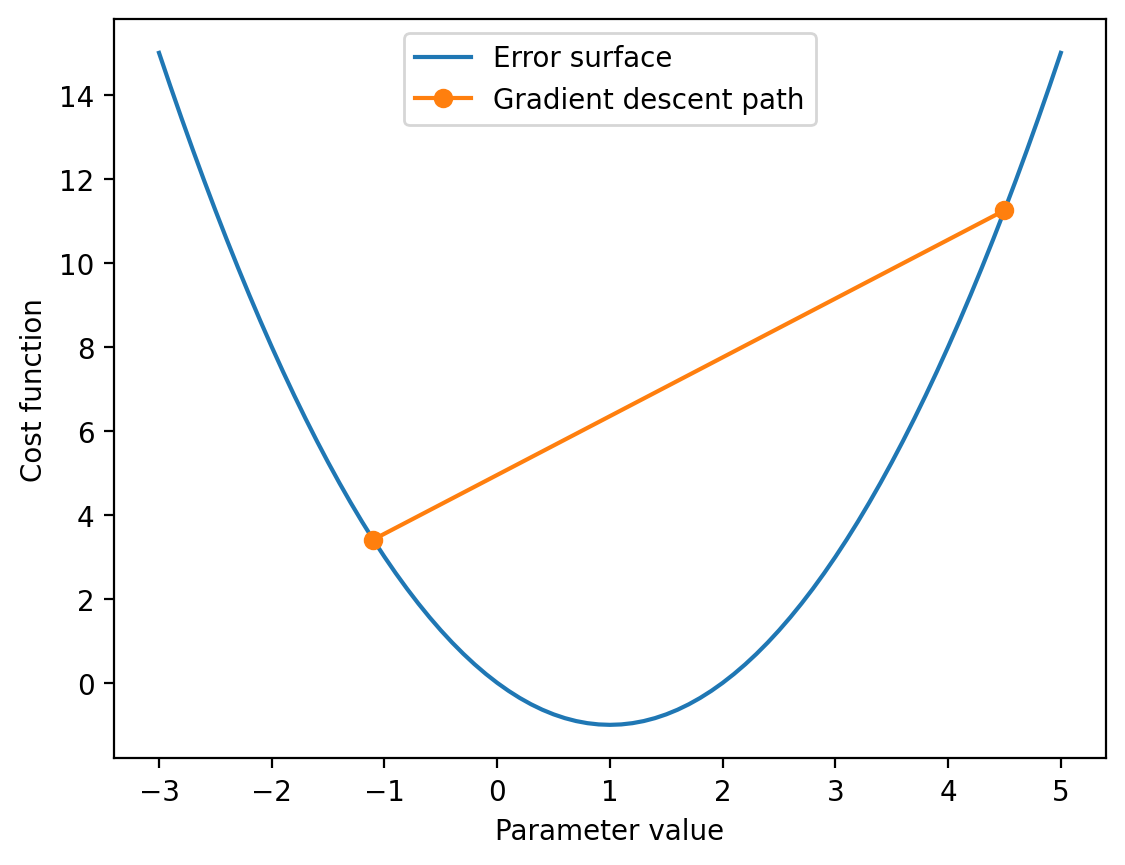

In [6]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [7]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)
x_path

array([ 4.5       , -1.1       ,  2.26      ,  0.244     ,  1.4536    ,
        0.72784   ,  1.163296  ,  0.9020224 ,  1.05878656,  0.96472806,
        1.02116316,  0.9873021 ,  1.00761874,  0.99542876,  1.00274275])

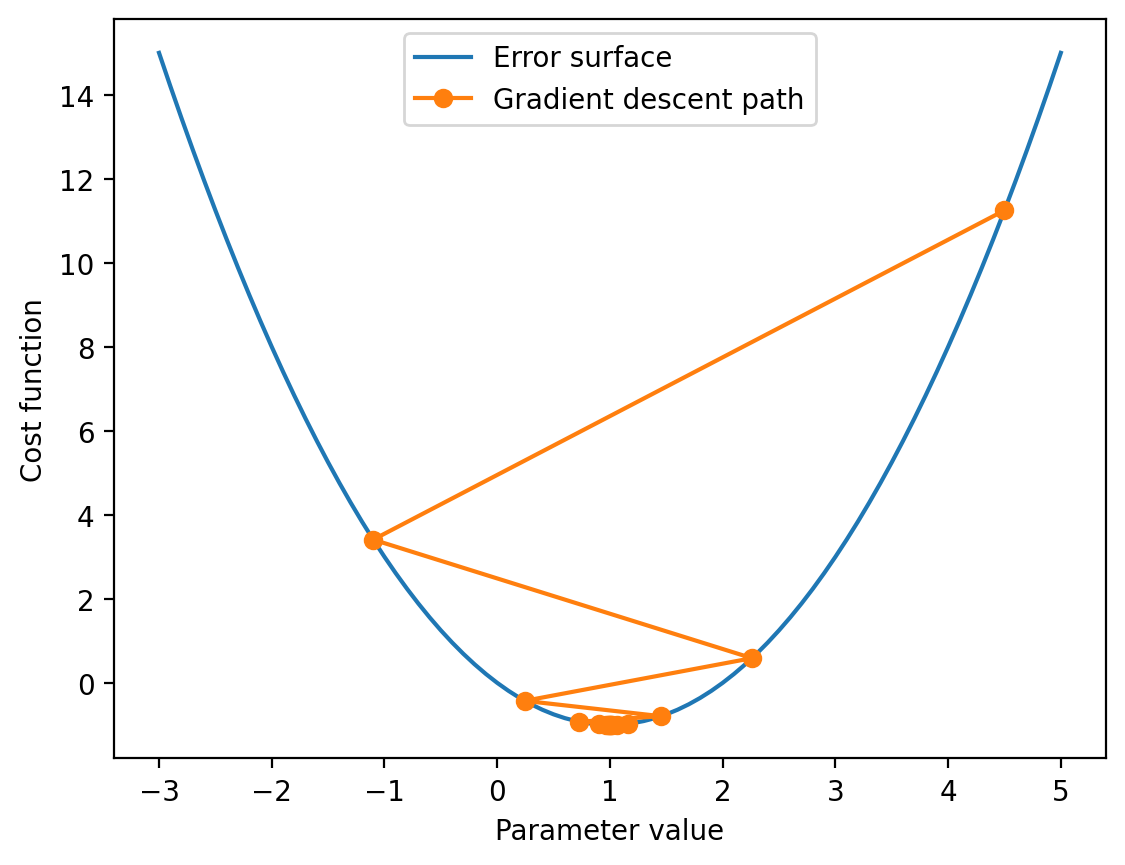

In [8]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [9]:
df = pd.read_csv('C:/Users/Box/Documents/Ebooks/Data Science/Projects and Data/Data Science Project/Chapter_1_cleaned_data.csv')

In [10]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']


In [11]:
features_response = [item for item in features_response if item not in items_to_remove]

In [12]:
corr = df[features_response].corr()
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


In [13]:
mpl.rcParams['figure.dpi'] = 400 #high res figures

<AxesSubplot: >

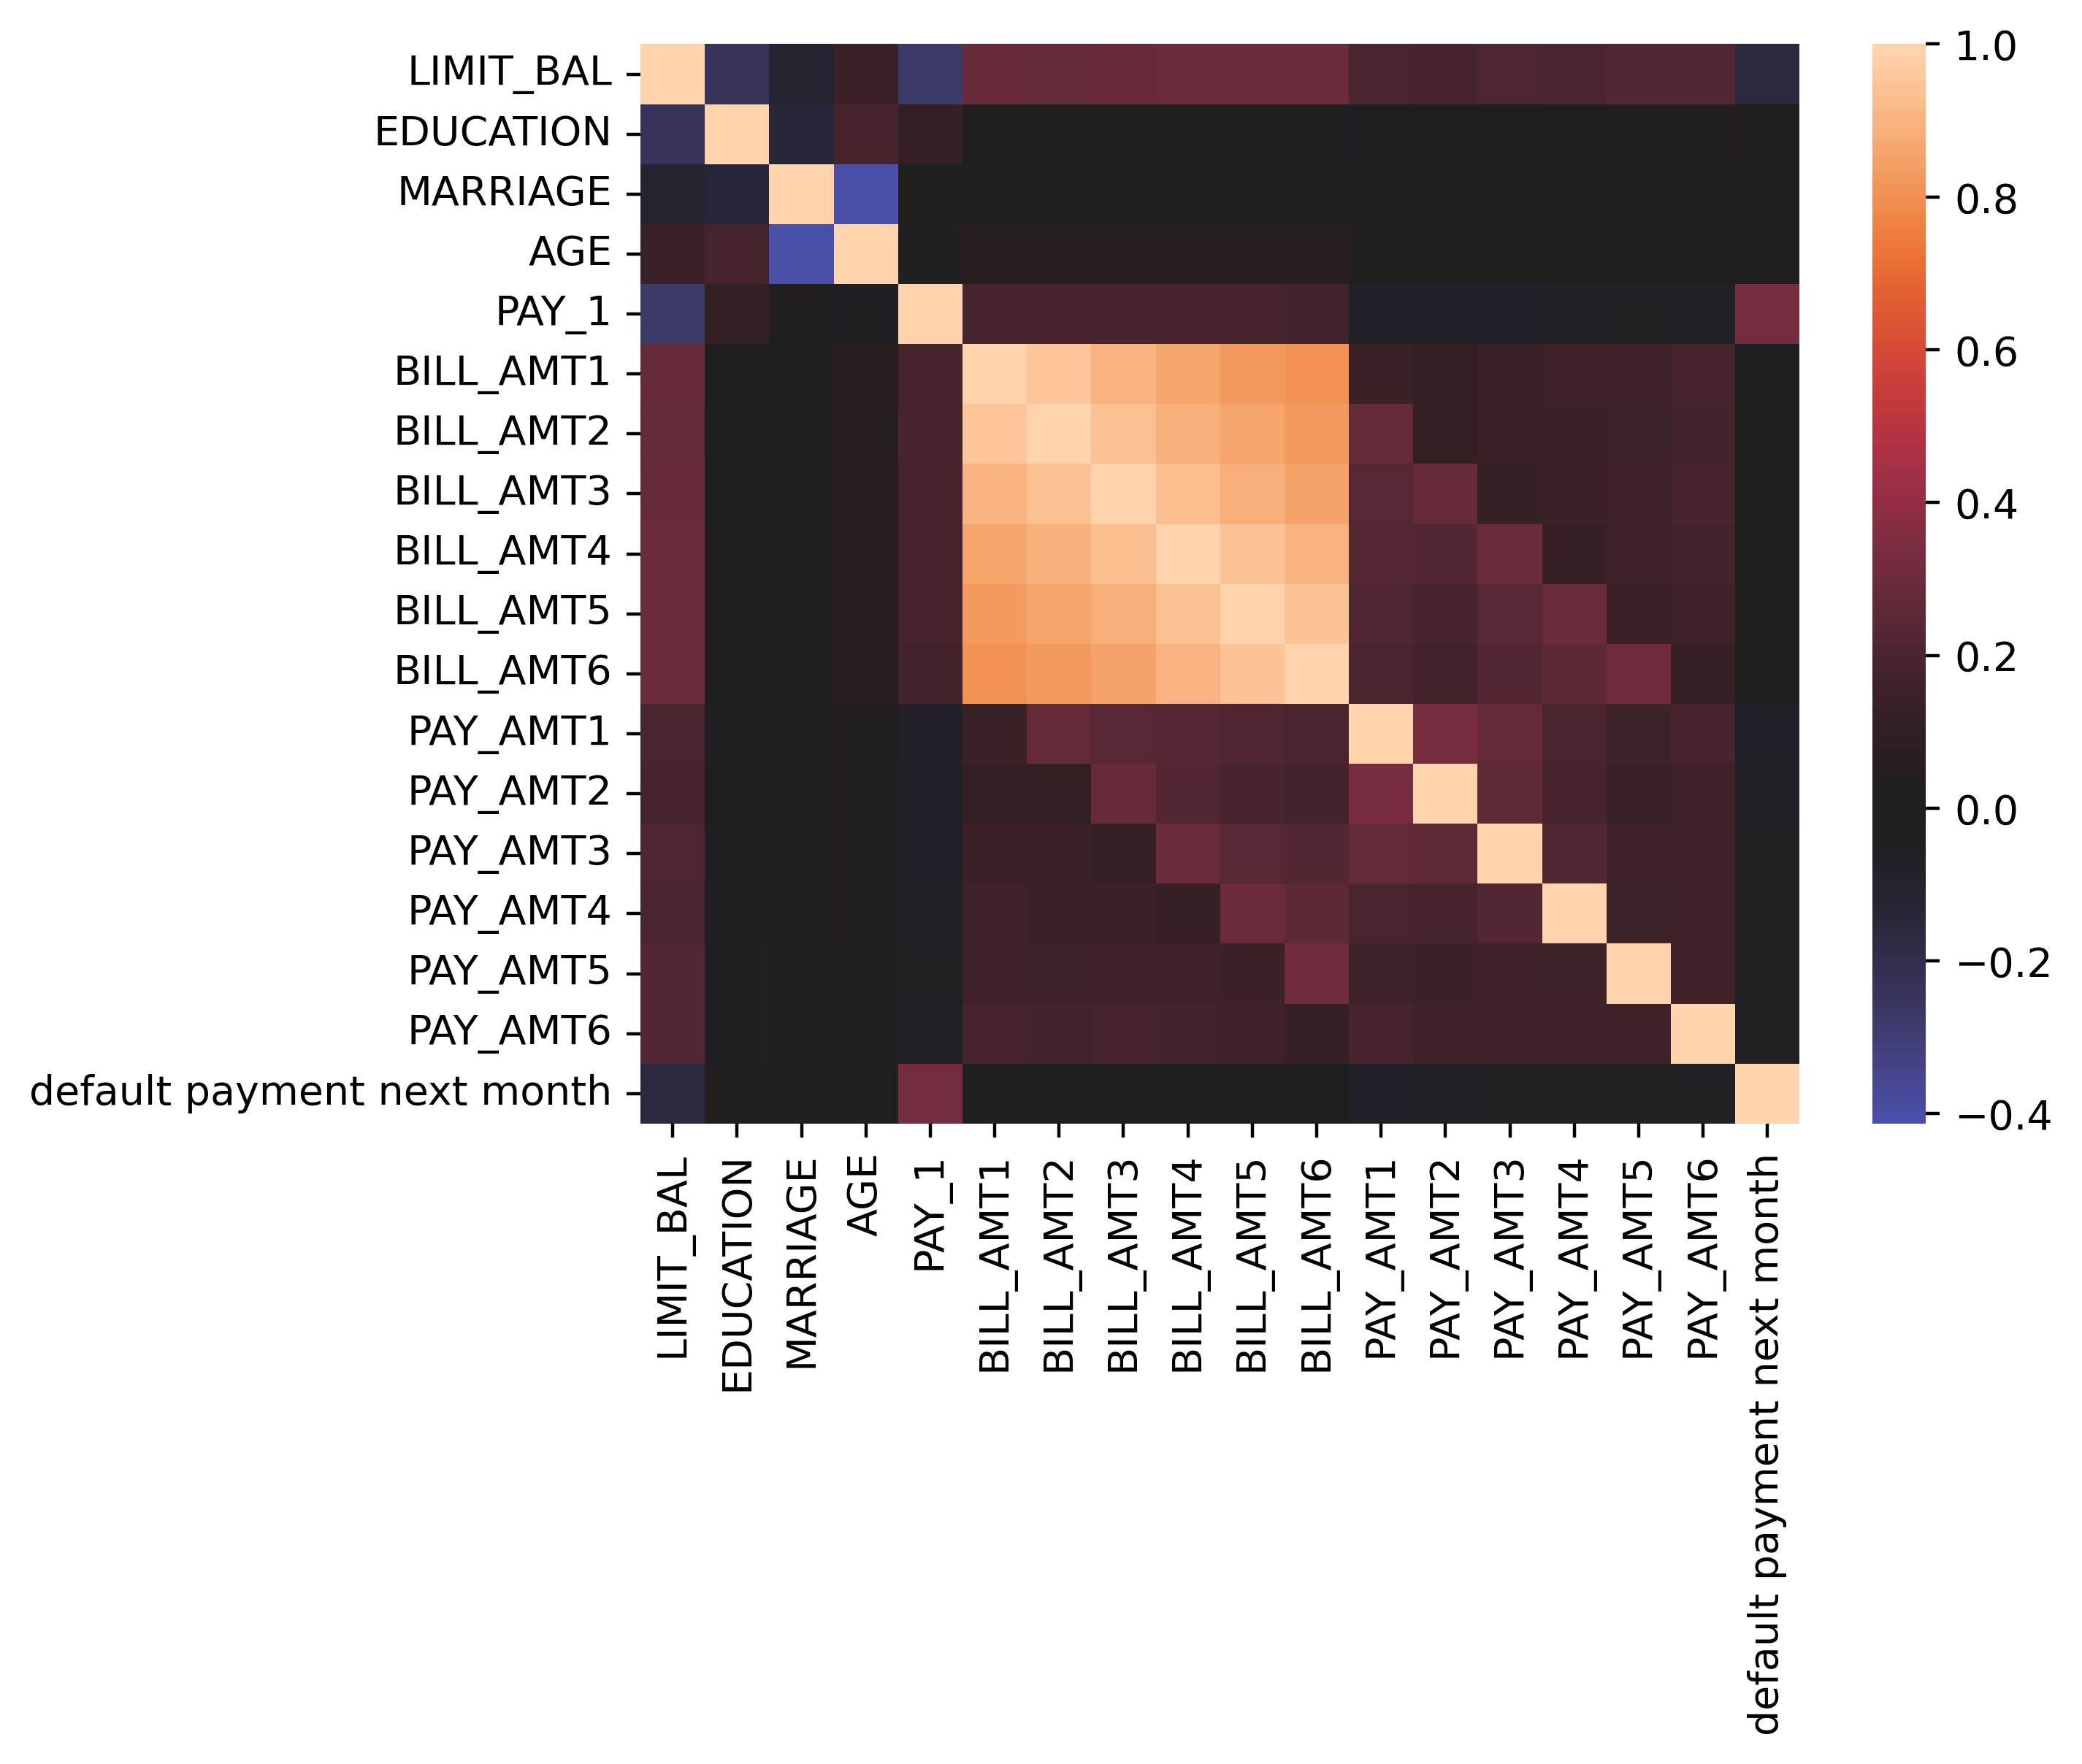

In [14]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [16]:
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10,
                                                n_repeated=0, n_classes=2,
                                                n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=0.8,
                                                hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=24)


In [17]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


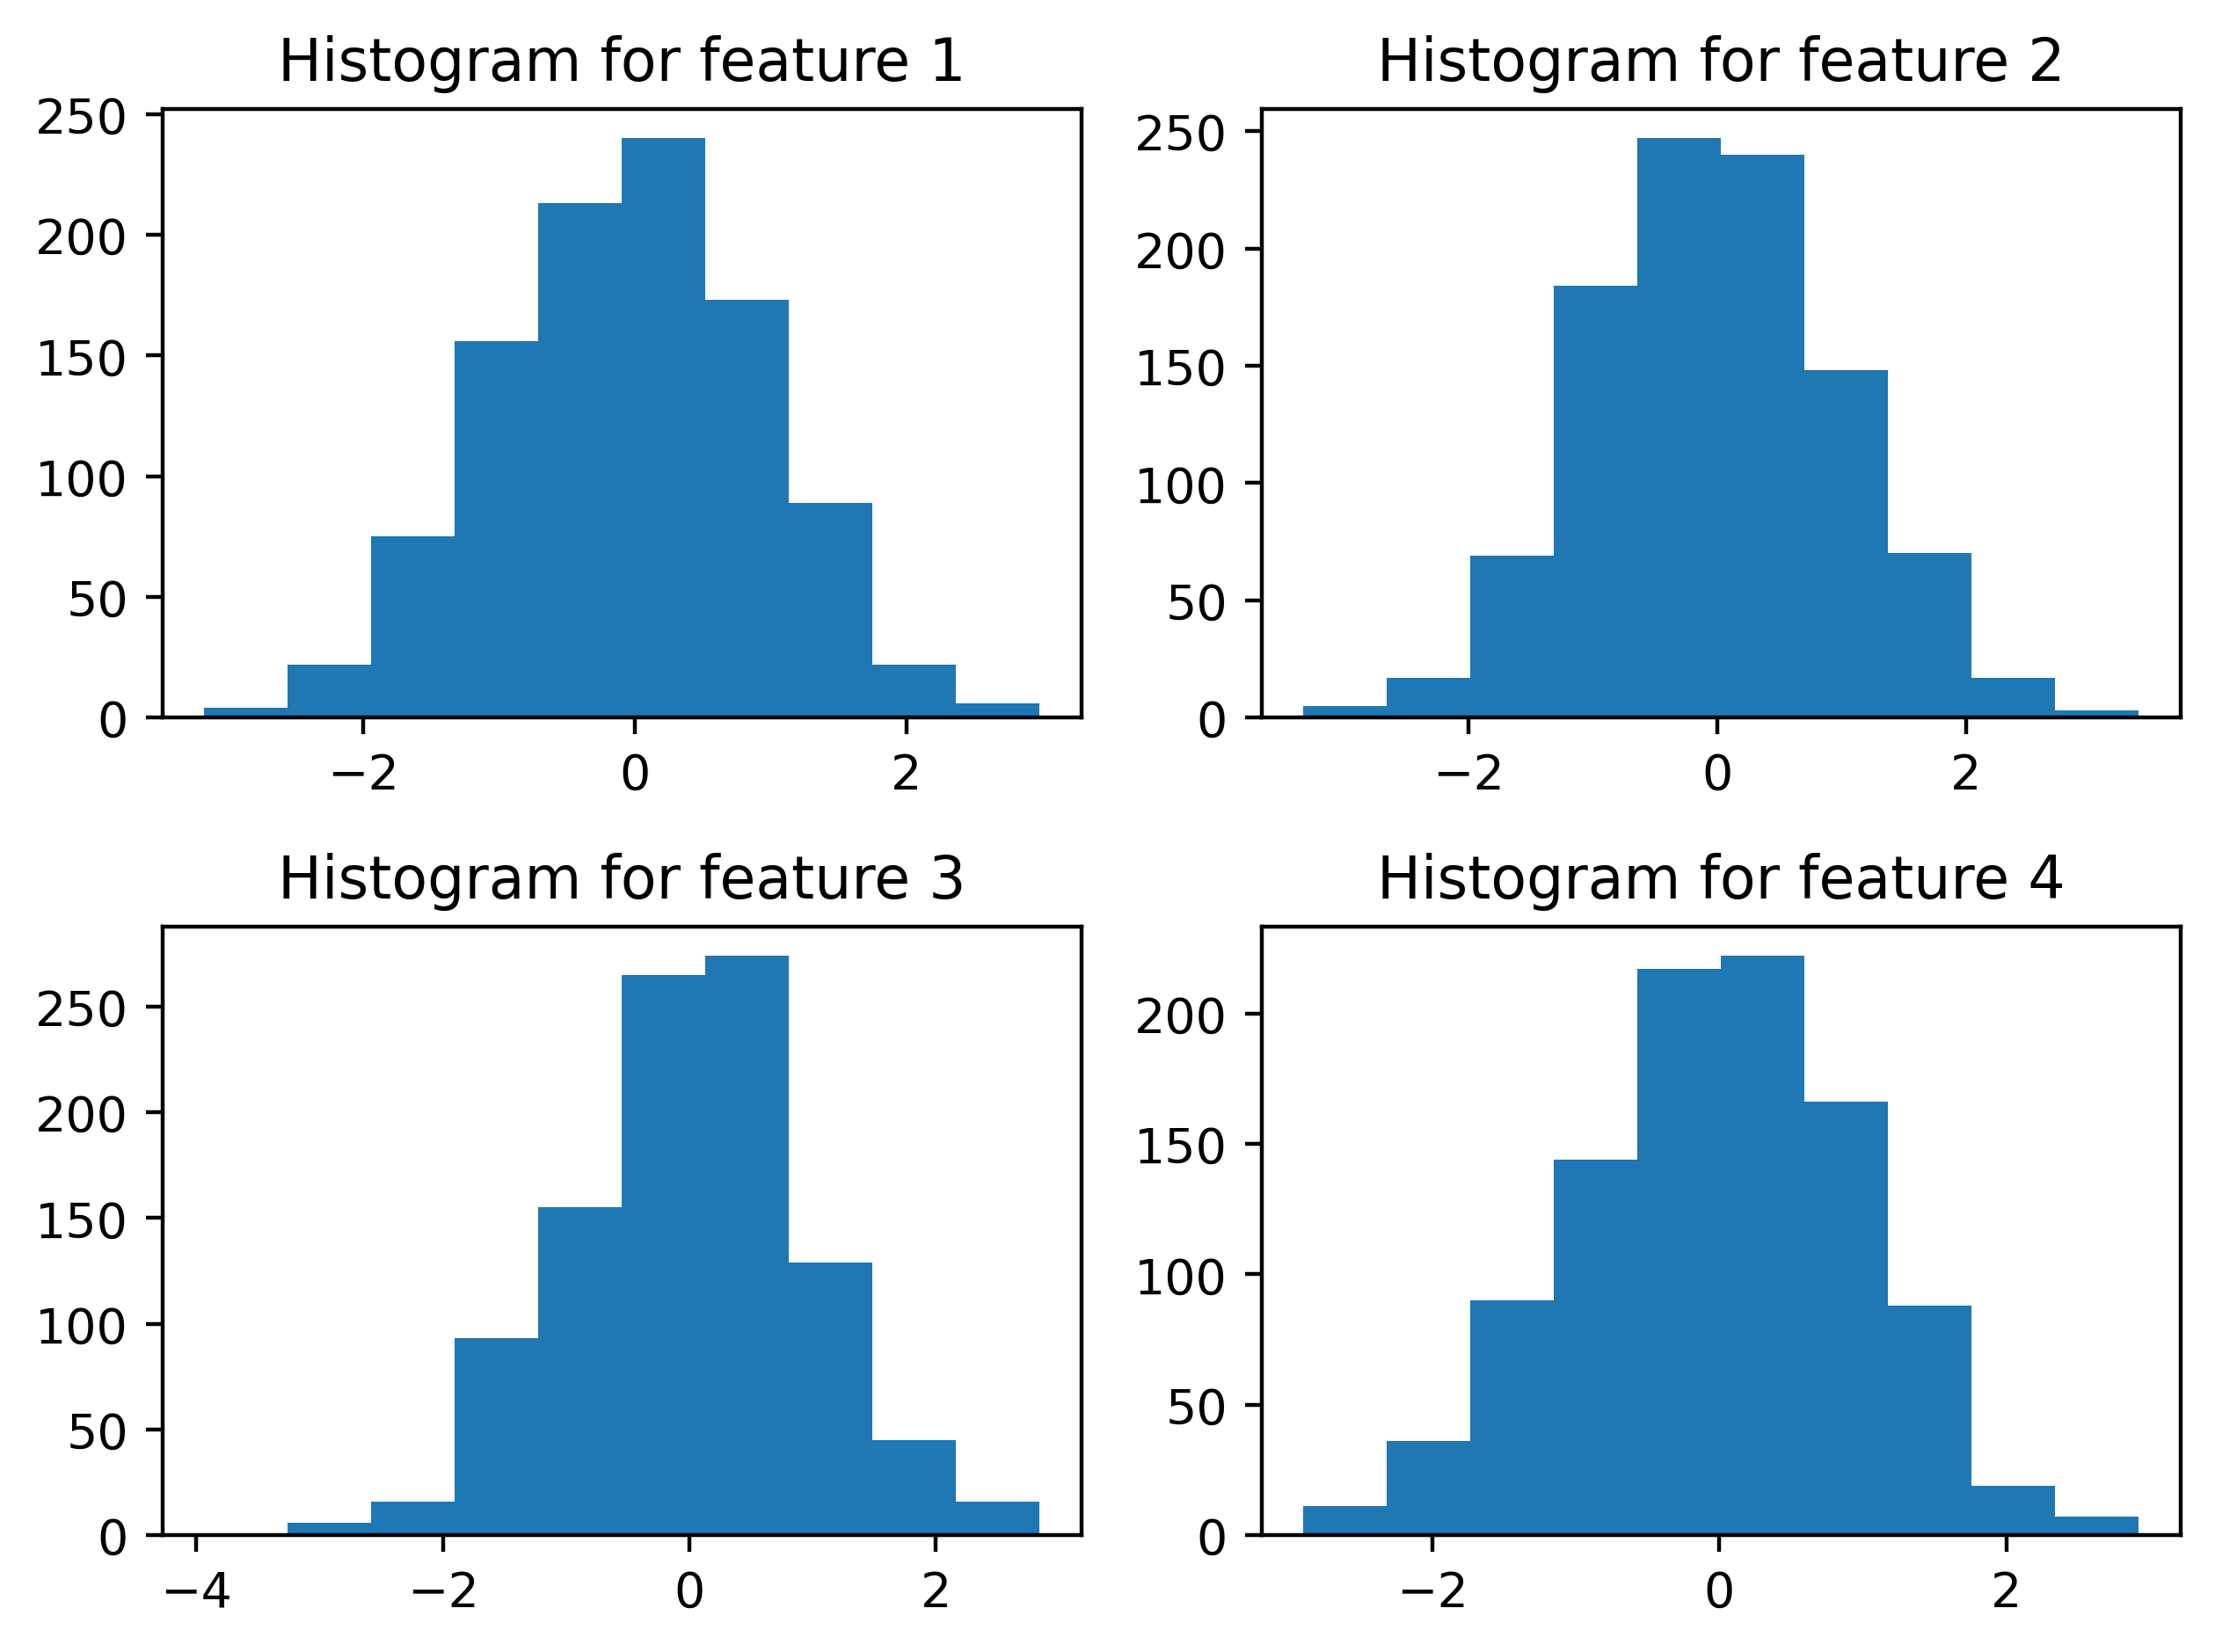

In [18]:
for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [19]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.2, random_state=24)
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)# L1 regularization == Lasso regularization
# C value corresponds to inverse of regularization srength, ie higher number lower regularization strength
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [20]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [21]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [23]:
n_folds = 5
k_folds = KFold(n_splits=n_folds, shuffle=False)

In [24]:
# for train_index, test_index in k_folds_iterator.split(X_syn_train, y_syn_train):
# This line would iterate through the splits, returning row indices of X_syn_train and y_syn_train to index the data 

In [25]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
k_folds

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [26]:
# Varying th C- Values
C_val_exponents = np.linspace(0,-2,33)
C_val_exponents

array([ 0.    , -0.0625, -0.125 , -0.1875, -0.25  , -0.3125, -0.375 ,
       -0.4375, -0.5   , -0.5625, -0.625 , -0.6875, -0.75  , -0.8125,
       -0.875 , -0.9375, -1.    , -1.0625, -1.125 , -1.1875, -1.25  ,
       -1.3125, -1.375 , -1.4375, -1.5   , -1.5625, -1.625 , -1.6875,
       -1.75  , -1.8125, -1.875 , -1.9375, -2.    ])

In [27]:
C_vals = float(10)**C_val_exponents
C_vals

array([1.        , 0.86596432, 0.74989421, 0.64938163, 0.56234133,
       0.48696753, 0.4216965 , 0.36517413, 0.31622777, 0.27384196,
       0.23713737, 0.2053525 , 0.17782794, 0.15399265, 0.13335214,
       0.1154782 , 0.1       , 0.08659643, 0.07498942, 0.06493816,
       0.05623413, 0.04869675, 0.04216965, 0.03651741, 0.03162278,
       0.0273842 , 0.02371374, 0.02053525, 0.01778279, 0.01539927,
       0.01333521, 0.01154782, 0.01      ])

In [28]:
from sklearn.metrics import roc_curve

In [29]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):
    
    n_folds = k_folds.n_splits   
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    
    for c_val_counter in range(len(C_vals)):
        
        model.C = C_vals[c_val_counter] # setting C- Value of model
        fold_counter = 0
        
        for train_index, test_index in k_folds.split(X, Y):
            
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]
            
            model.fit(X_cv_train, y_cv_train)
            
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, 
                                                                          y_cv_train_predict_proba[:,1])
            
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, 
                                                                         y_cv_test_predict_proba[:,1])
            
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            
            fold_counter += 1
            
        print('Done with C = {}'.format(lr_syn.C))
            
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [30]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1.0
Done with C = 0.8659643233600653
Done with C = 0.7498942093324559
Done with C = 0.6493816315762113
Done with C = 0.5623413251903491
Done with C = 0.4869675251658631
Done with C = 0.4216965034285822
Done with C = 0.3651741272548377
Done with C = 0.31622776601683794
Done with C = 0.27384196342643613
Done with C = 0.23713737056616552
Done with C = 0.2053525026457146
Done with C = 0.1778279410038923
Done with C = 0.1539926526059492
Done with C = 0.1333521432163324
Done with C = 0.11547819846894582
Done with C = 0.1
Done with C = 0.08659643233600653
Done with C = 0.07498942093324558
Done with C = 0.06493816315762113
Done with C = 0.05623413251903491
Done with C = 0.04869675251658631
Done with C = 0.042169650342858224
Done with C = 0.03651741272548377
Done with C = 0.03162277660168379
Done with C = 0.027384196342643614
Done with C = 0.023713737056616554
Done with C = 0.02053525026457146
Done with C = 0.01778279410038923
Done with C = 0.01539926526059492
Done with C = 0.0133

In [31]:
type(cv_test_roc[9][0])

tuple

In [32]:
#cv_test_roc

In [33]:
#"""def cross_val_C_search(k_folds, C_vals, model, X, Y):
#    
#    n_folds = k_folds.n_splits
#    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
#   cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
#   cv_test_roc = [[]]*len(C_vals)
#
#    for c_val_counter in range(len(C_vals)):
#        #Set the C value for the model object
#        model.C = C_vals[c_val_counter]
#       #Count folds for each value of C
#       fold_counter = 0
#       #Get training and testing indices for each fold
#       for train_index, test_index in k_folds.split(X, Y):
#           #Subset the features and response, for training and testing data for
#           #this fold
#           X_cv_train, X_cv_test = X[train_index], X[test_index]
#           y_cv_train, y_cv_test = Y[train_index], Y[test_index]
#
#            #Fit the model on the training data
#            model.fit(X_cv_train, y_cv_train)
#
#            #Get the training ROC AUC
#            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
#            cv_train_roc_auc[fold_counter, c_val_counter] = \
#            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
#
#            #Get the testing ROC AUC
#            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
#            cv_test_roc_auc[fold_counter, c_val_counter] = \
#            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
#
#            #Testing ROC curves for each fold
#            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
#            cv_test_roc[c_val_counter].append(this_fold_roc)
#
#            #Increment the fold counter
#            fold_counter += 1
#
#        #Indicate progress
#        print('Done with C = {}'.format(lr_syn.C))
#
#    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc"""

#cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
#cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Text(0.5, 1.0, 'Cross validation scores for each fold')

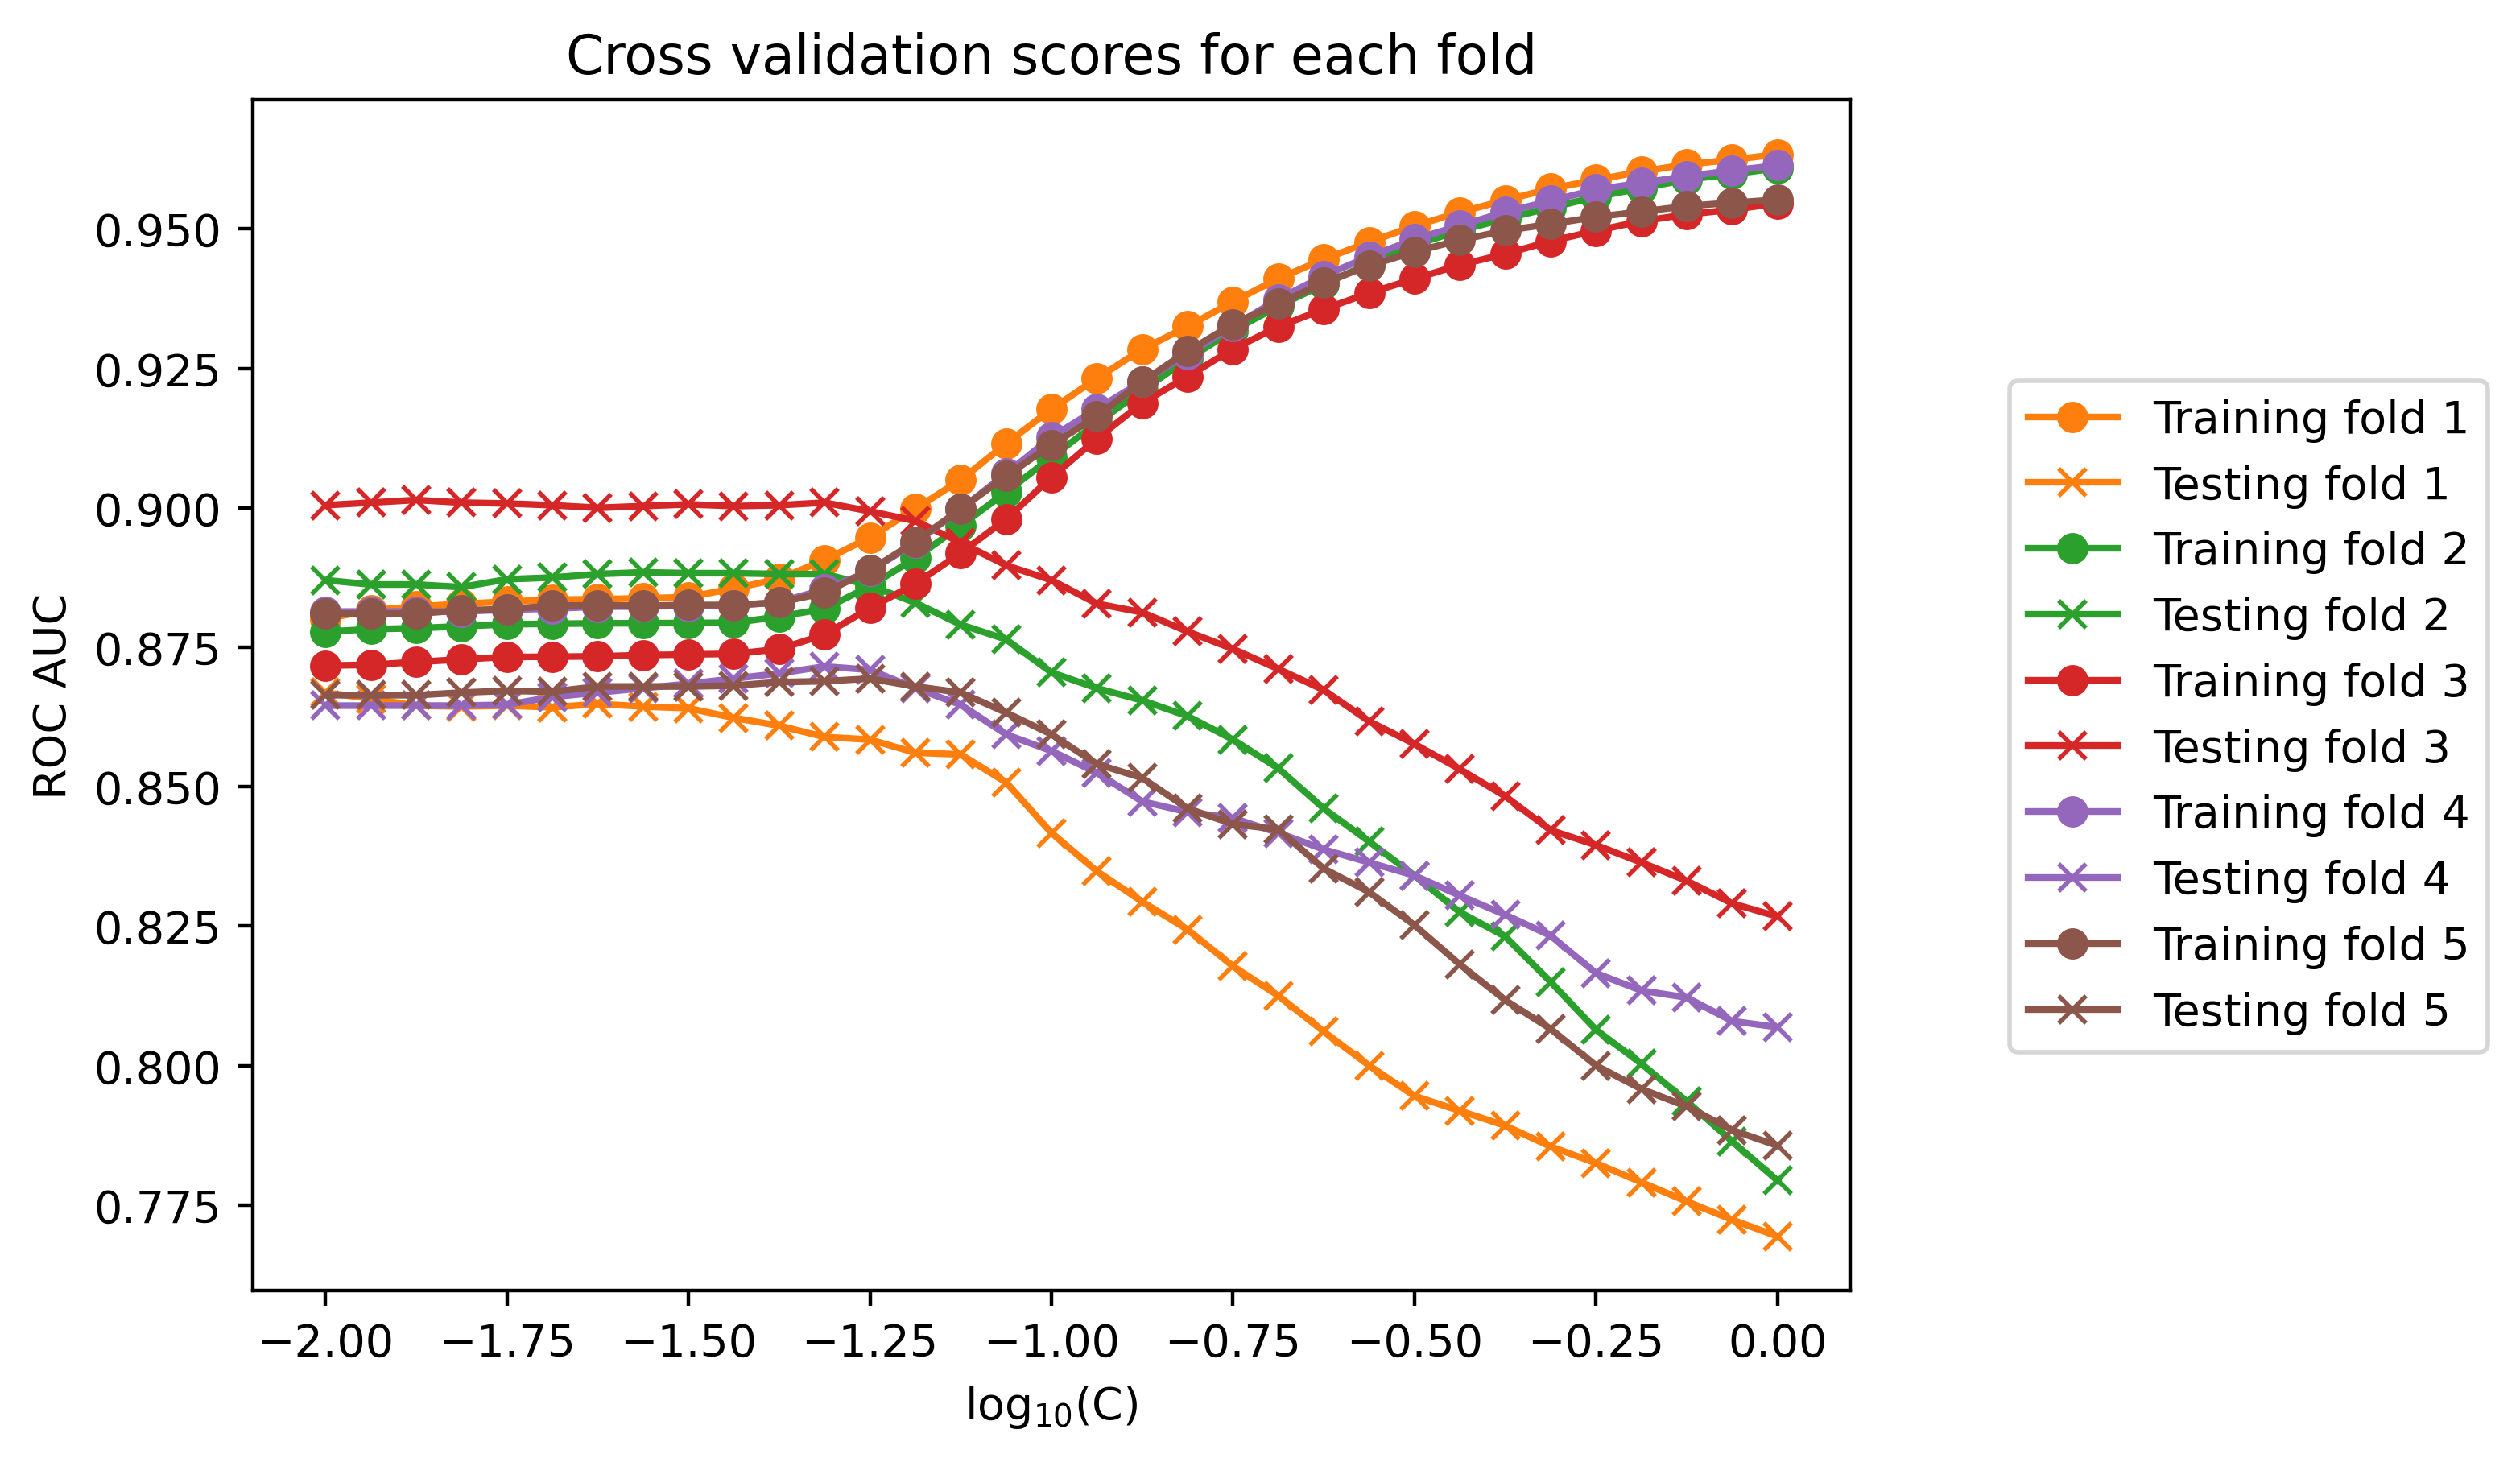

In [34]:
for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o', color = 'C{}'.format(this_fold+1),
             label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x', color = 'C{}'.format(this_fold+1),
              label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

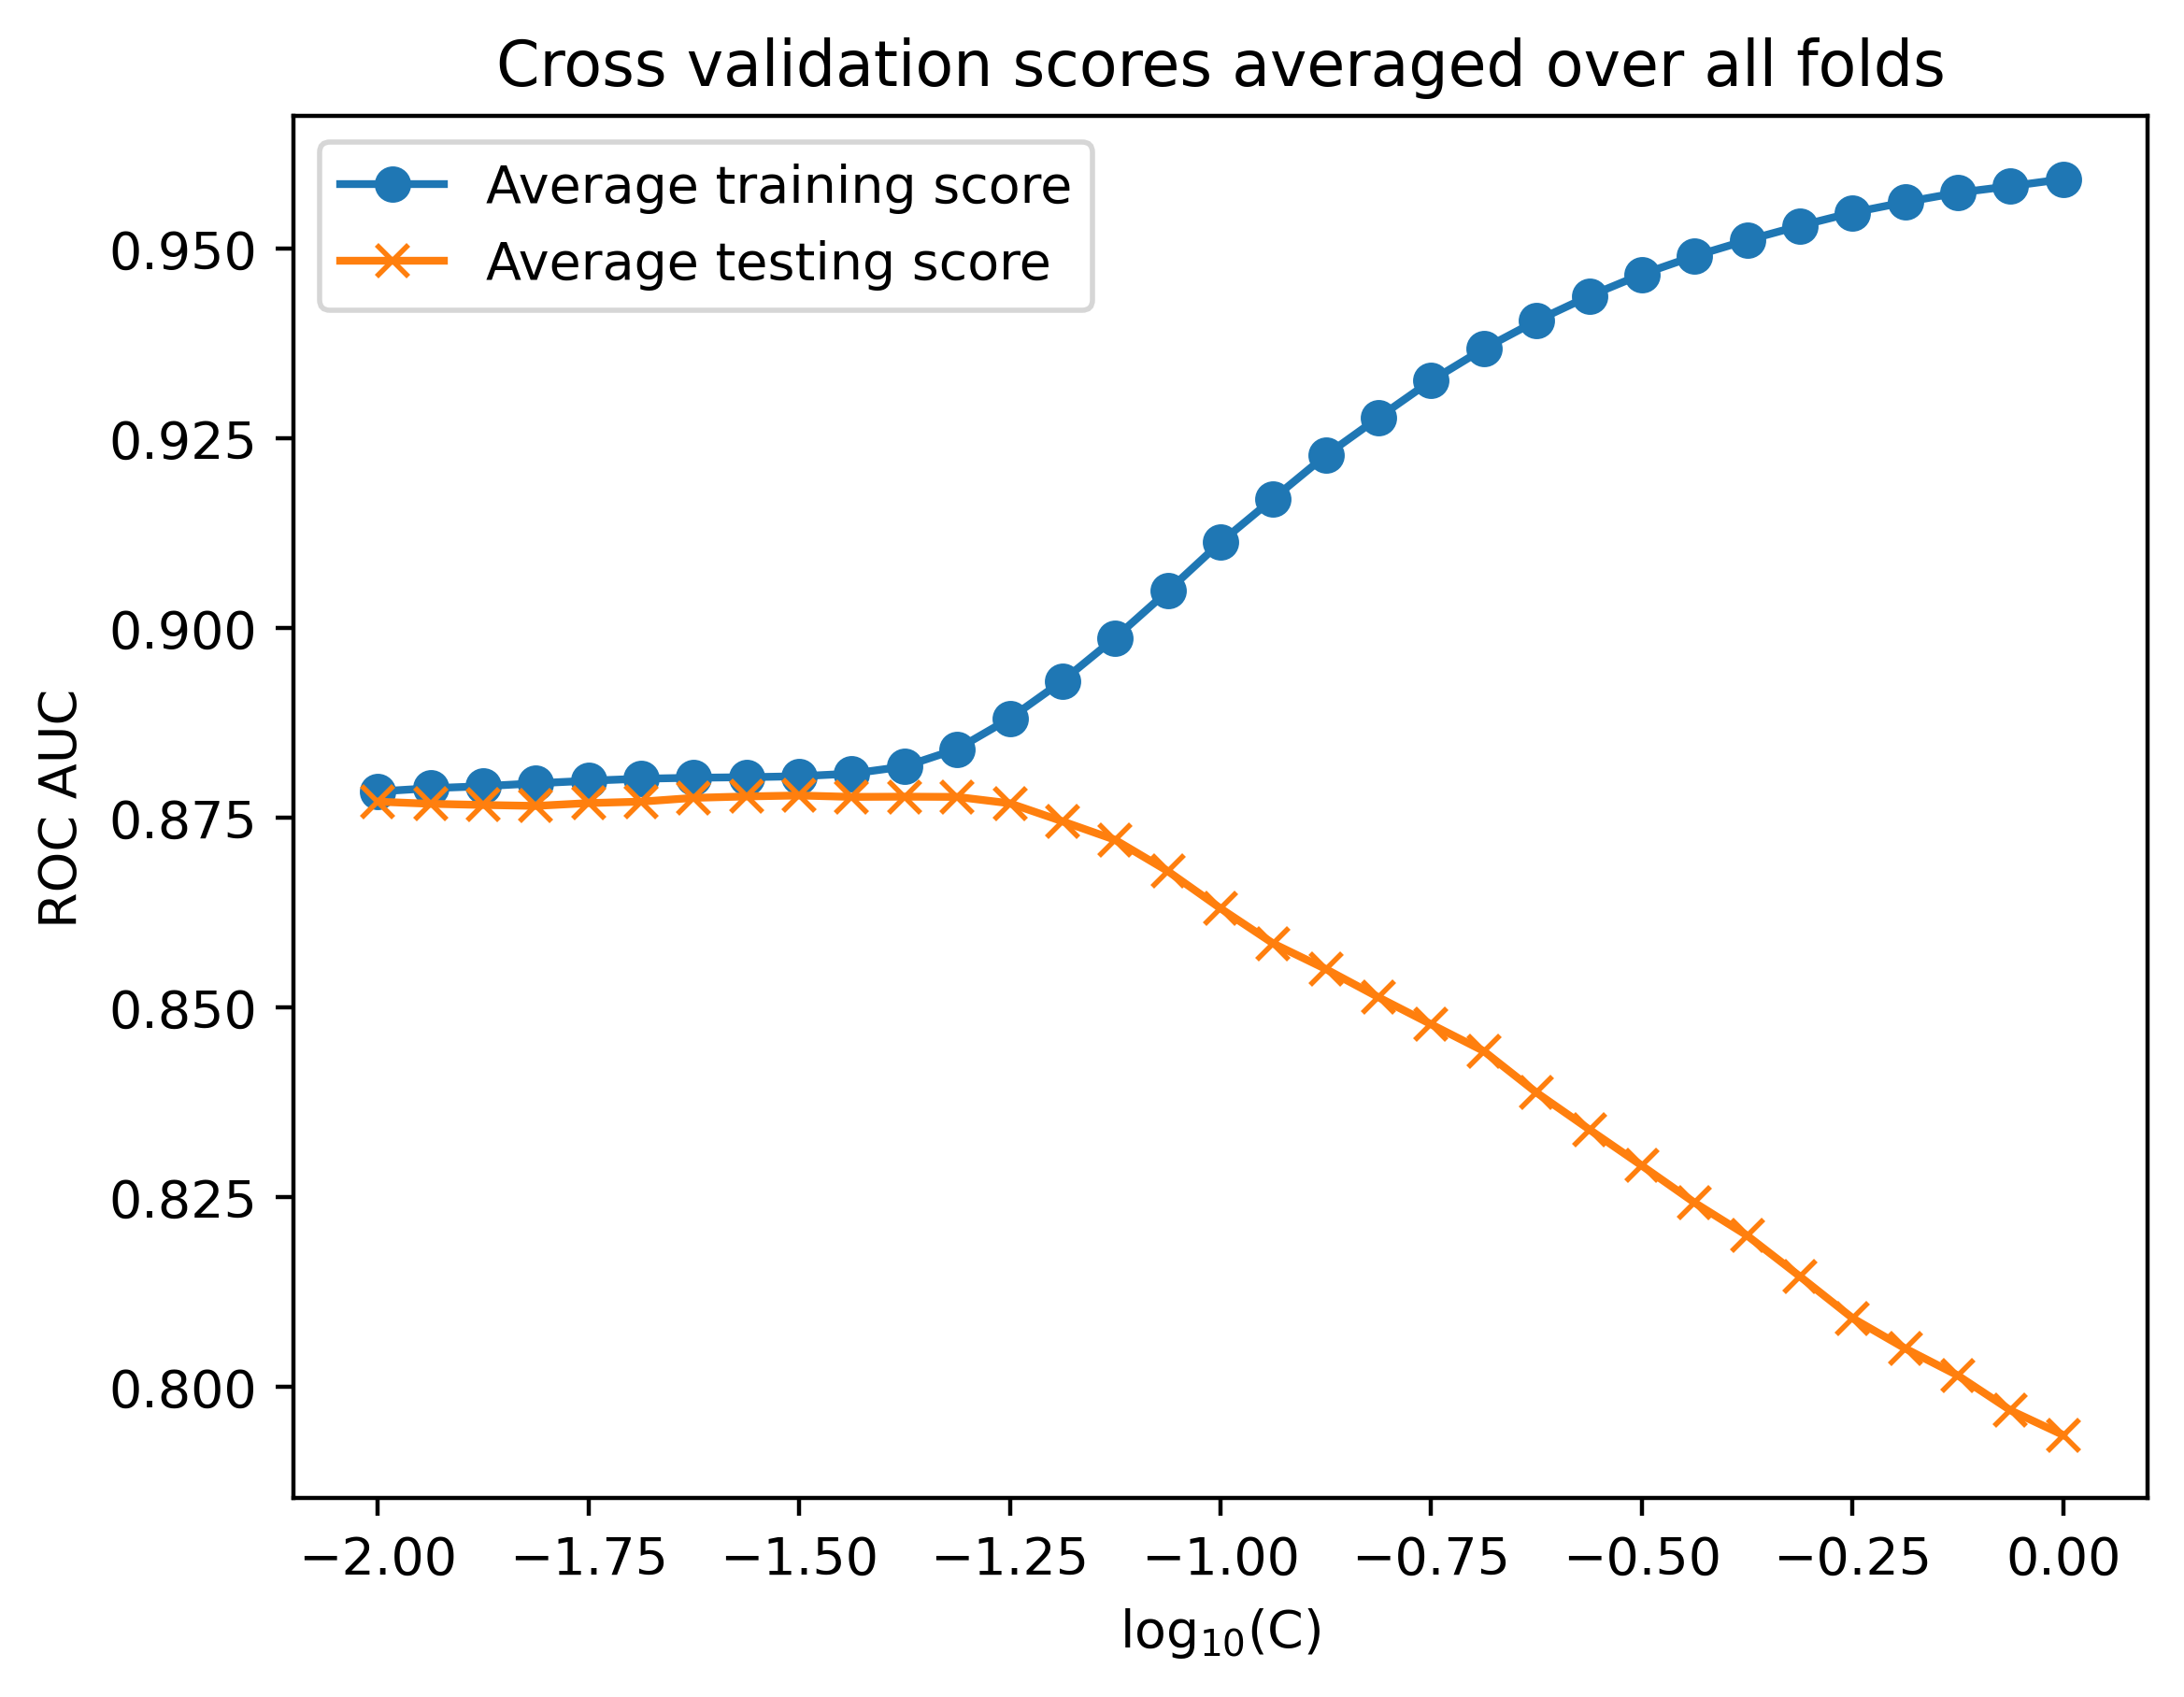

In [35]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
    label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
     label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

In [36]:
C_val_exponents

array([ 0.    , -0.0625, -0.125 , -0.1875, -0.25  , -0.3125, -0.375 ,
       -0.4375, -0.5   , -0.5625, -0.625 , -0.6875, -0.75  , -0.8125,
       -0.875 , -0.9375, -1.    , -1.0625, -1.125 , -1.1875, -1.25  ,
       -1.3125, -1.375 , -1.4375, -1.5   , -1.5625, -1.625 , -1.6875,
       -1.75  , -1.8125, -1.875 , -1.9375, -2.    ])

In [37]:
best_C_val_bool = C_val_exponents == C_val_exponents[20]
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int)) 
best_C_val_ix[0][0]

20

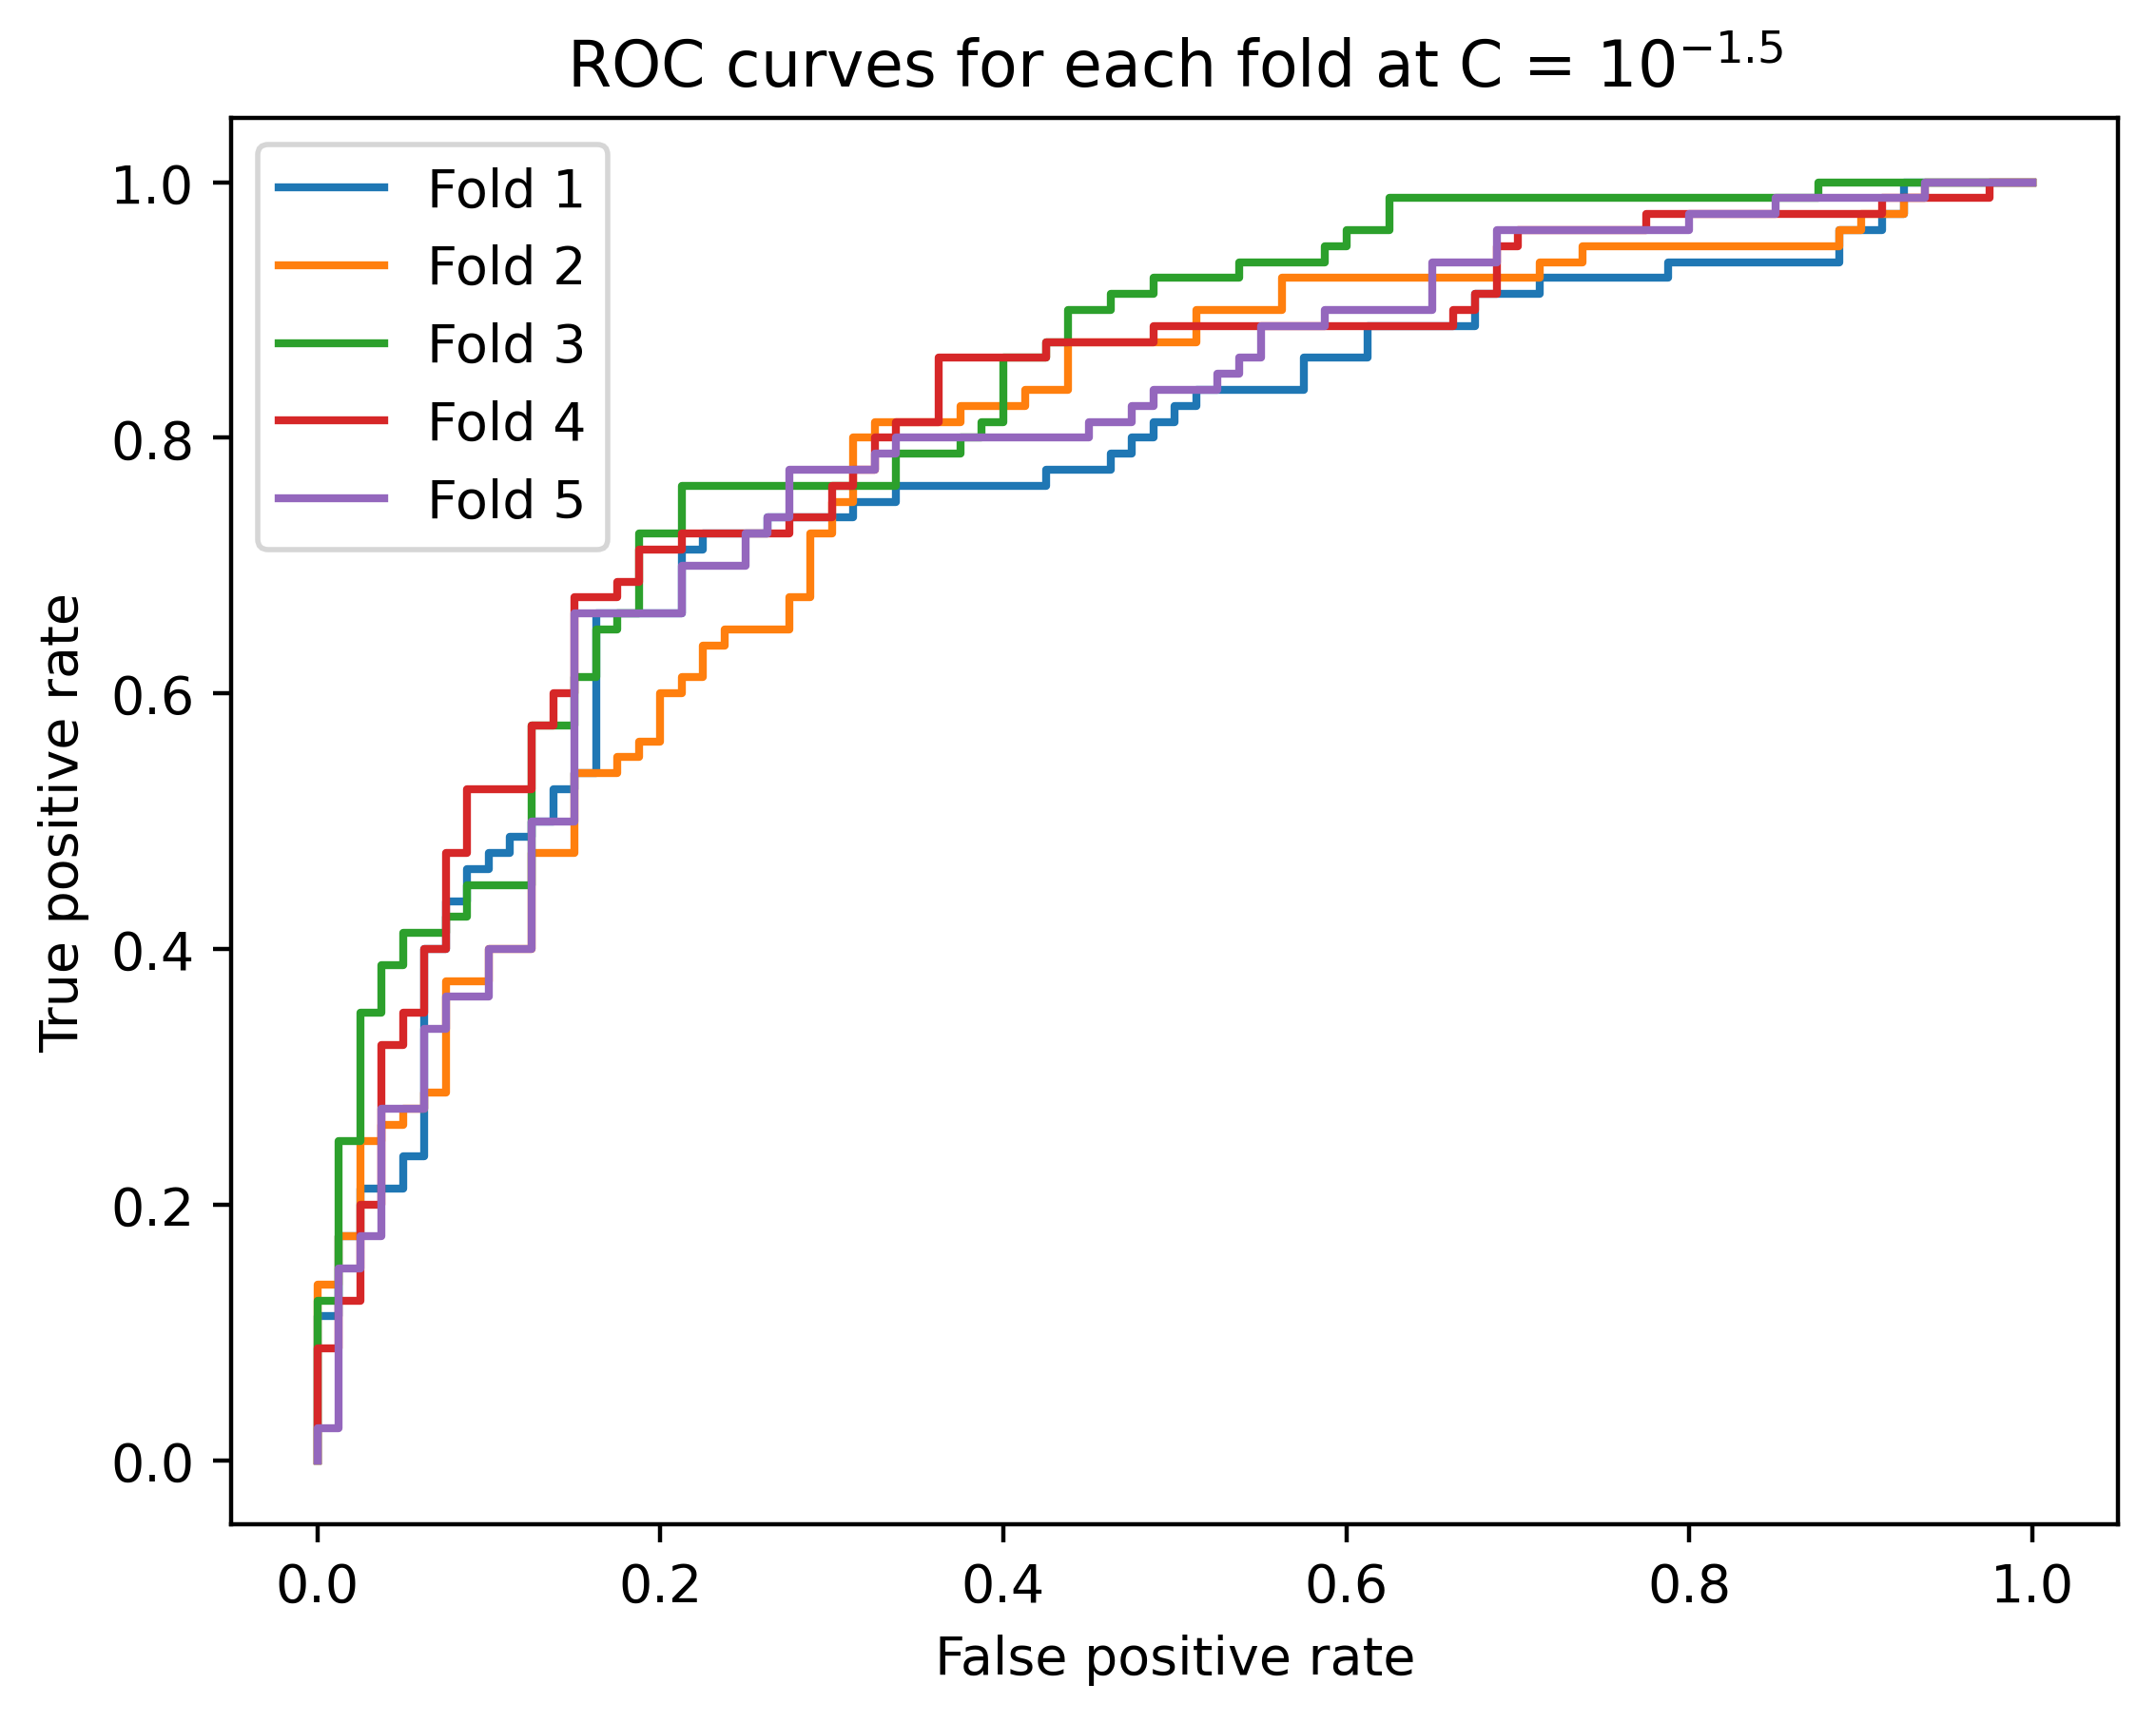

In [39]:
for this_fold in range(k_folds.n_splits):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

In [40]:
k_folds.n_splits

5

In [41]:
best_C_val_ix

(array([20], dtype=int64),)

In [42]:
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [43]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8802812499999999

In [44]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8847884788478848

In [45]:
sum((lr_syn.coef_ != 0)[0])

2

In [46]:
lr_syn.intercept_

array([0.])

In this exercise, we accomplished several goals. We used the k-folds cross-validation
procedure to tune the regularization hyperparameter. We saw the power of
regularization for reducing overfitting, and in the case of L1 regularization in logistic
regression, selecting features.

In [47]:
# now scaling data
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [48]:
# using sklearns "pipeline" for scaling and log regression (important for crossvalidation of sets:
# need to scale and rescale)
# instantiating pipeline
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [49]:
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [50]:

scale_lr_pipeline.get_params()['model__C']

1.0

In [51]:
scale_lr_pipeline.set_params(model__C = 2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [52]:
# including interactions
make_interactions = PolynomialFeatures(degree=2, interaction_only=True,
                                        include_bias=False)

### Activity 4 | Cross-Validation and Feature Engineering with the Case Study Data

In [53]:
df = pd.read_csv("""C:/Users/Box/Documents/Ebooks/Data Science/\
Projects and Data/Data Science Project/Chapter_1_cleaned_data.csv""")

In [54]:
features_response = df.columns.tolist()
print('Features before removal')
print(features_response)
print()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university','default payment next month']
features_response = [item for item in features_response if item not in items_to_remove]
print('Features after removal')
print(features_response)
print()
X = df[features_response].values
X.shape

Features before removal
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

Features after removal
['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']



(26664, 17)

In [55]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
n_folds = 5
k_folds = KFold(n_splits=n_folds, shuffle=False)
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
k_folds

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [56]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response].values, df['default payment next month'].values, 
                 test_size = 0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [57]:
# instantiate MinMaxScaler to scale the data
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [58]:
# intantiate log Regression and pipeline with the saga solver
# saga solver is not robust to unscaled data
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000) # 5000 is way too many 
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [59]:
# use .get_params() to see changeable parameters 
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [60]:
scale_lr_pipeline.get_params()['model__C']

1.0

In [61]:
scale_lr_pipeline.set_params(model__C = 2)
scale_lr_pipeline.get_params()['model__C']

2

In [62]:
C_val_exponents = np.linspace(2,-3,6)
C_vals = float(10)**C_val_exponents
print(C_vals)
C_val_exponents[5]

[1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03]


-3.0

In [63]:
# define the new crossvalidation function using 'pipeline' instead of 'model' 
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    
    for c_val_counter in range(len(C_vals)):
        pipeline.set_params(model__C = C_vals[c_val_counter])
        fold_counter = 0

        for train_index, test_index in k_folds.split(X, Y):

            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            pipeline.fit(X_cv_train, y_cv_train)

            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
            
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            
            fold_counter += 1

        print('Done with C = {}'.format(pipeline.get_params()['model__C']))
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [64]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


In [65]:
cv_test_roc[2][2][2]

array([1.99161872e+00, 9.91618721e-01, 9.87145778e-01, ...,
       2.12814937e-02, 2.09298611e-02, 1.01543974e-07])

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

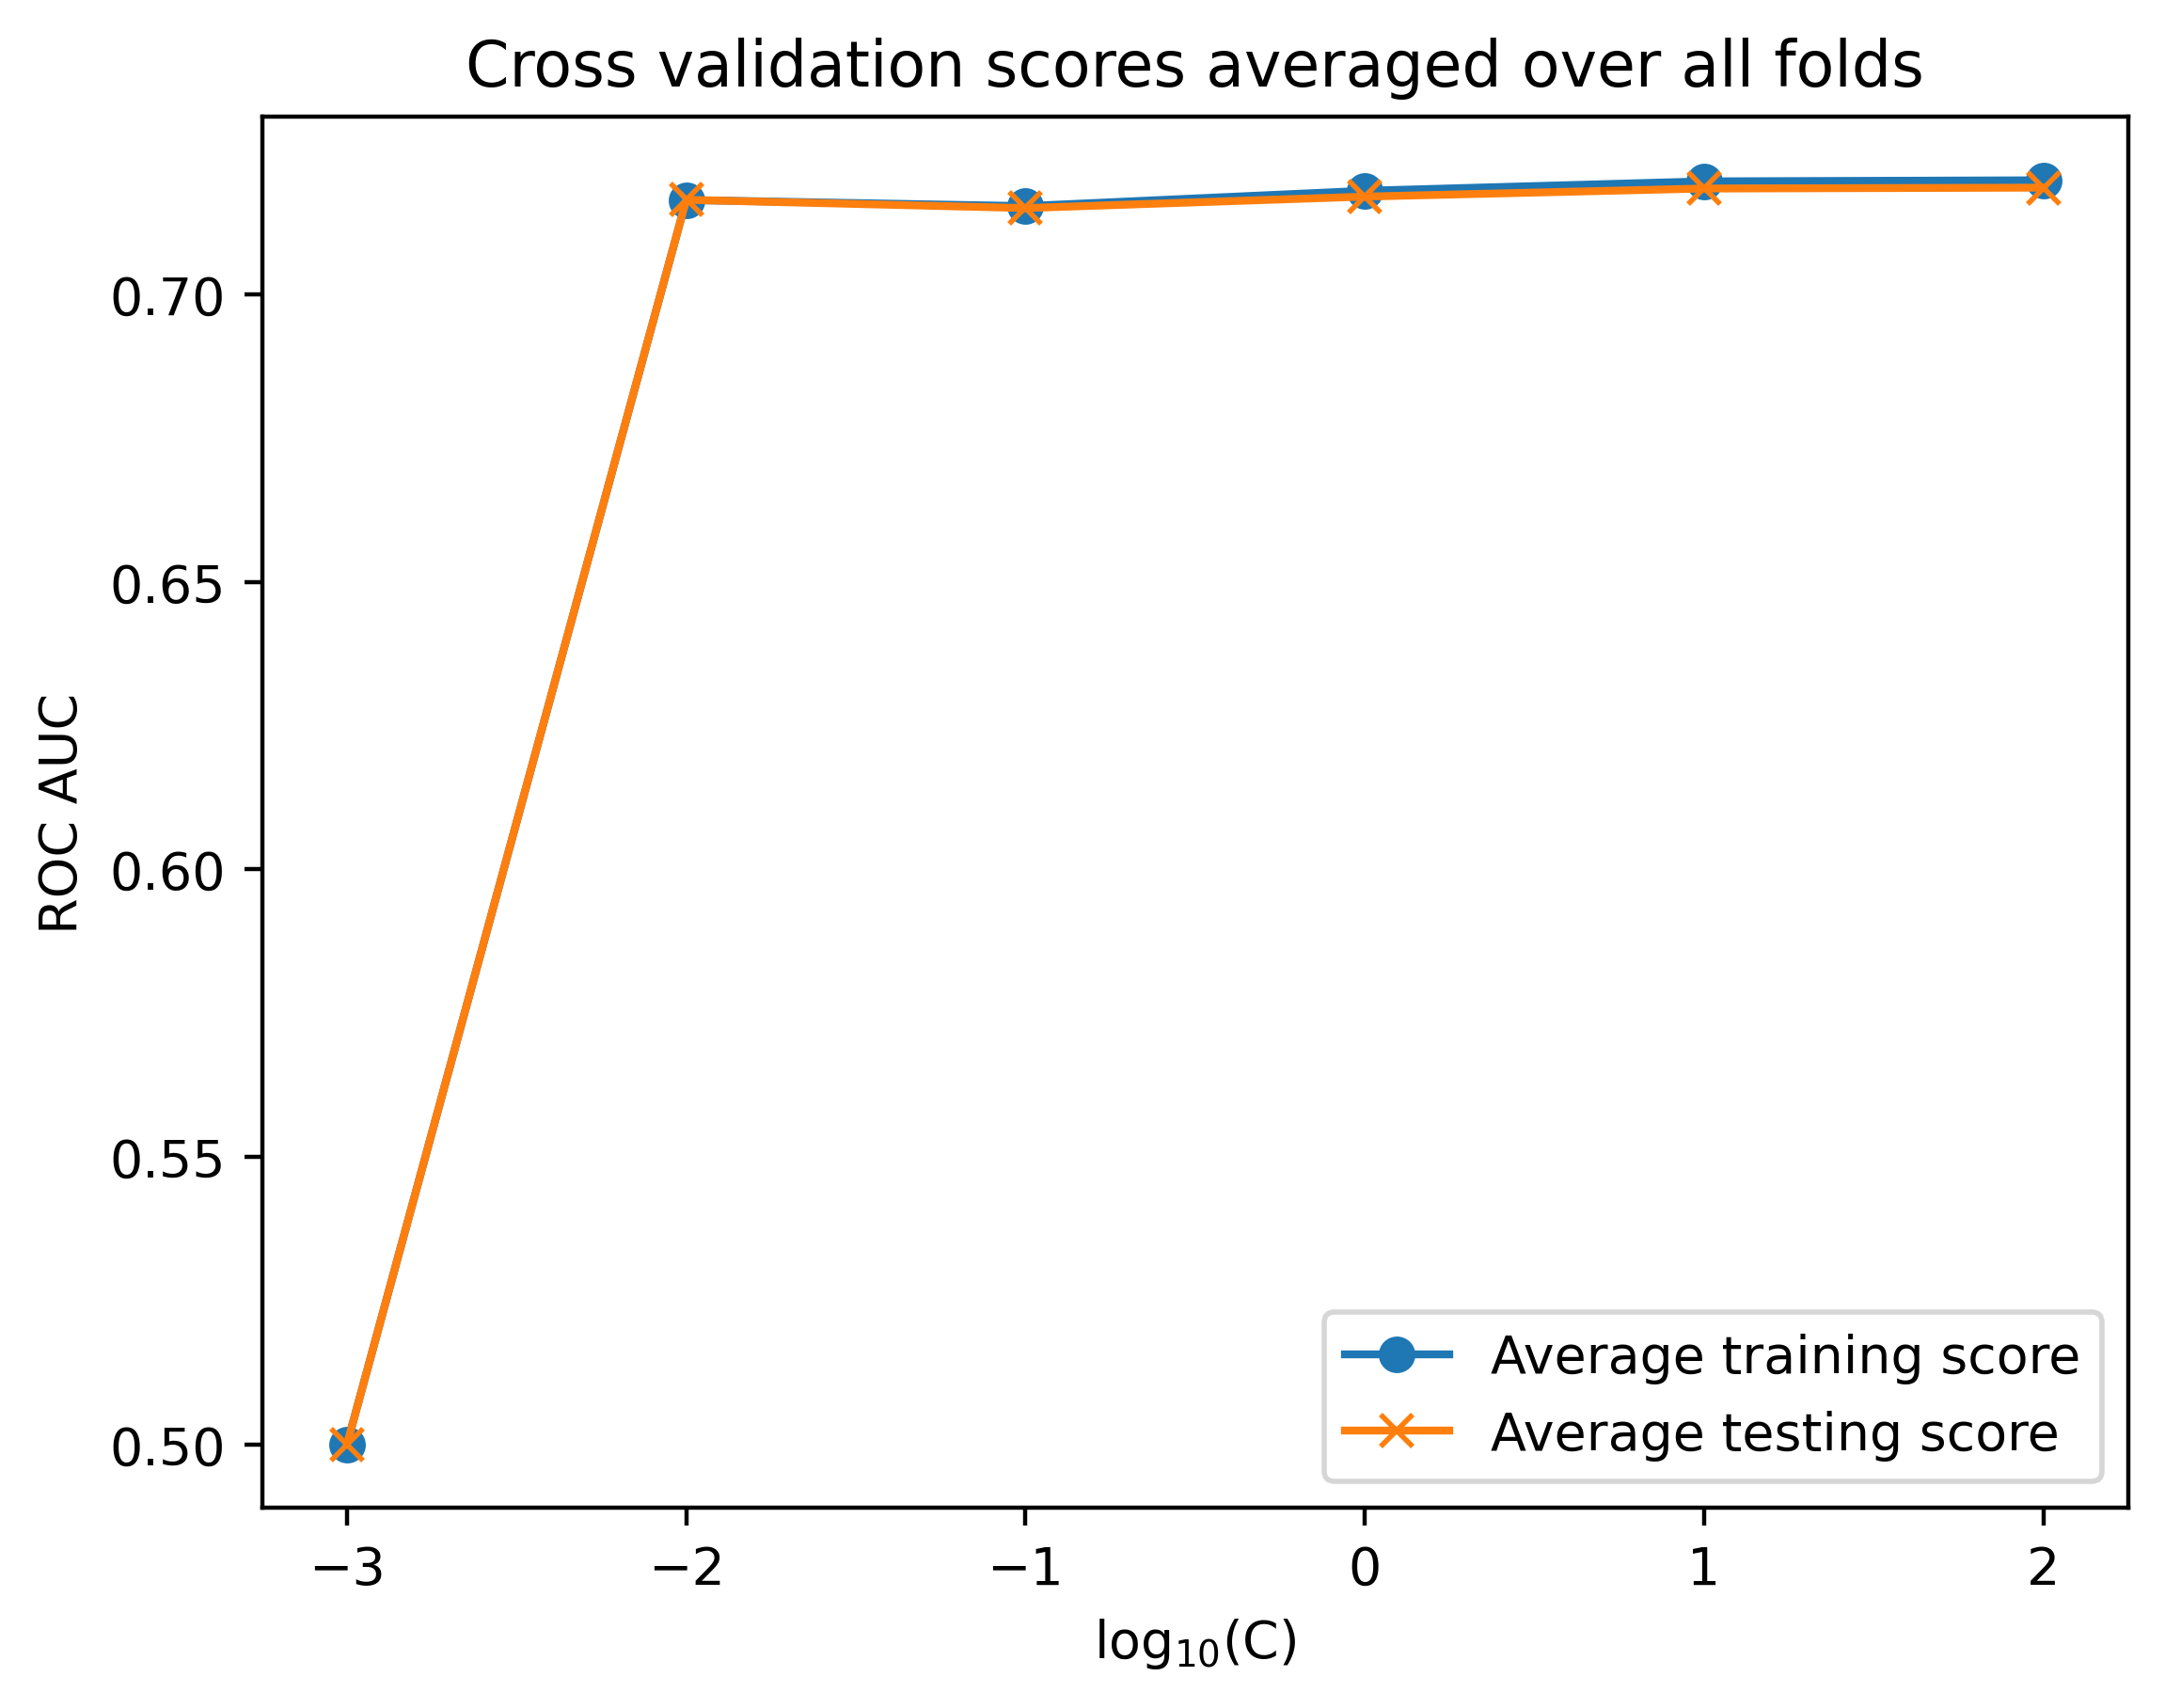

In [66]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
    label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
     label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

In [67]:
# looks like we may be underfitting, so
# now we're including interactions
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True,
                                        include_bias=False)

In [68]:
X_interact = make_interactions.fit_transform(df[features_response].values)
X_interact.shape

(26664, 153)

In [69]:
X_train, X_test, y_train, y_test = \
train_test_split(X_interact, df['default payment next month'].values, 
                 test_size = 0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


In [70]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWa

Done with C = 100.0


C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWa

Done with C = 10.0


C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Box\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWa

Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


In [72]:
print('done')

done


Text(0.5, 1.0, 'Cross validation scores averaged over all folds | Including Interactions')

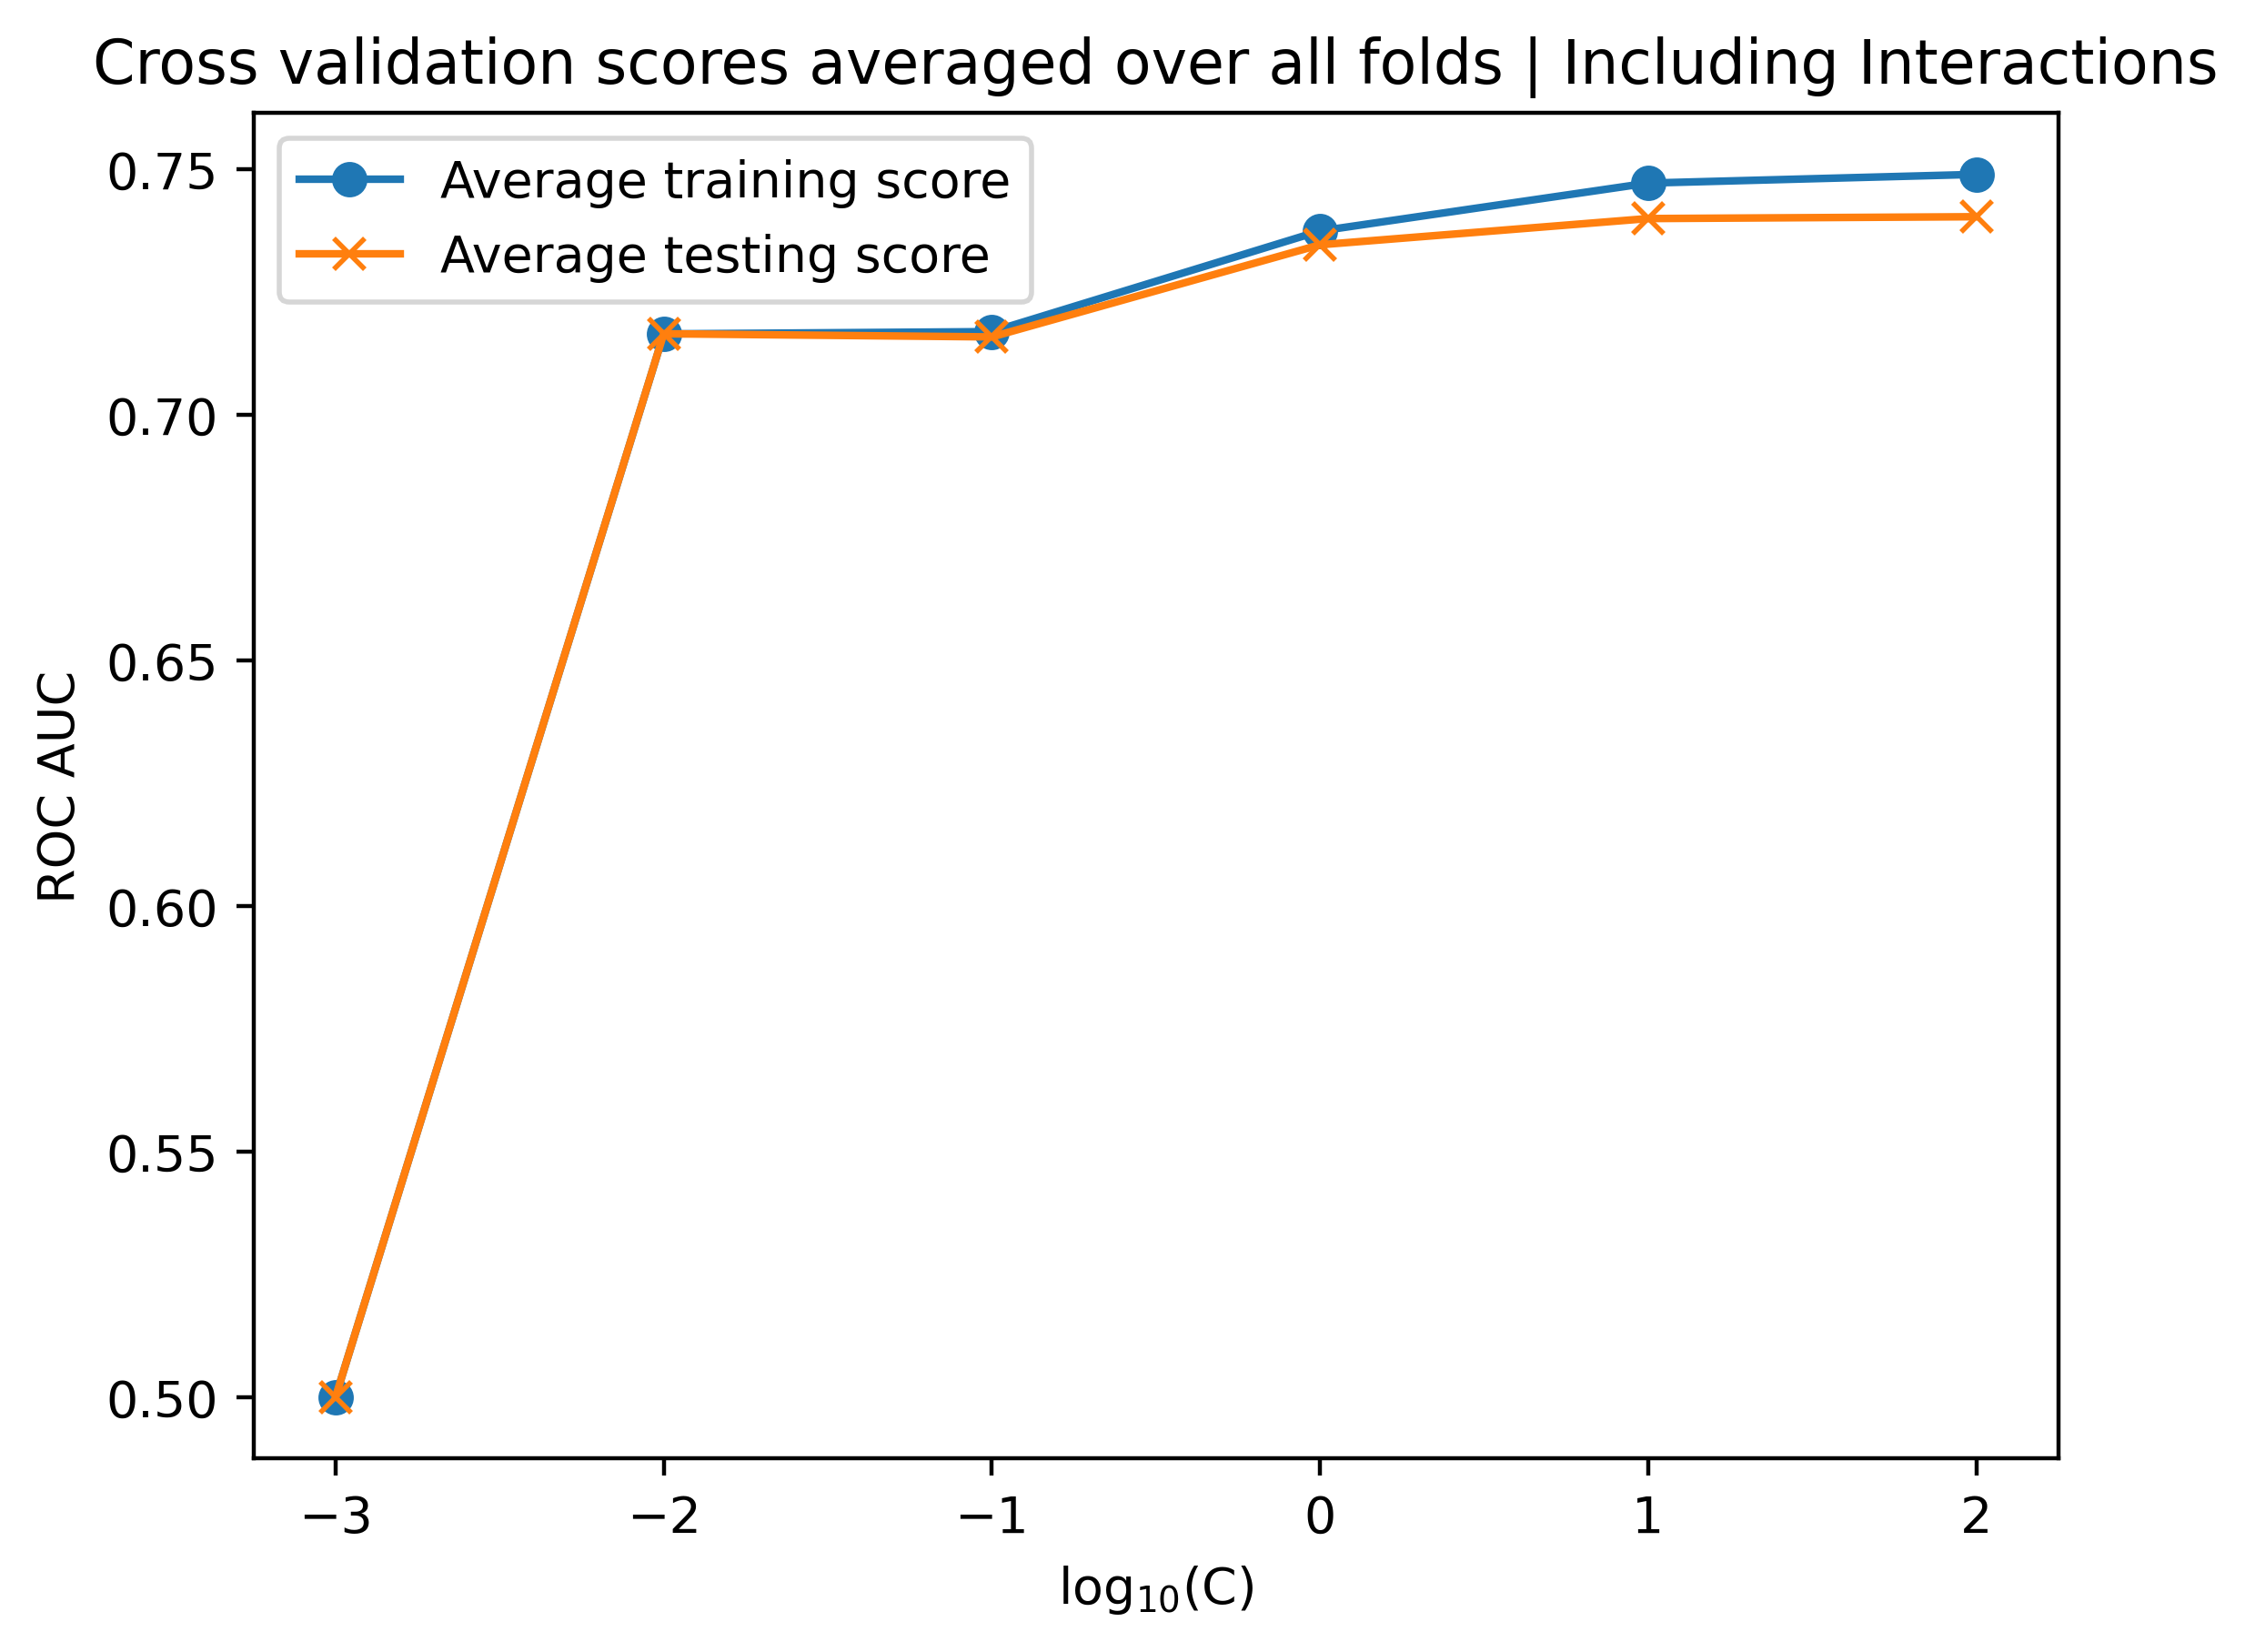

In [73]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
    label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
     label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds | Including Interactions')